# 一阶逻辑回归

In [429]:
import pandas as pd
import numpy as np

data = pd.read_csv('examdata.csv')
data.head()


,Exam1,Exam2,Pass
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


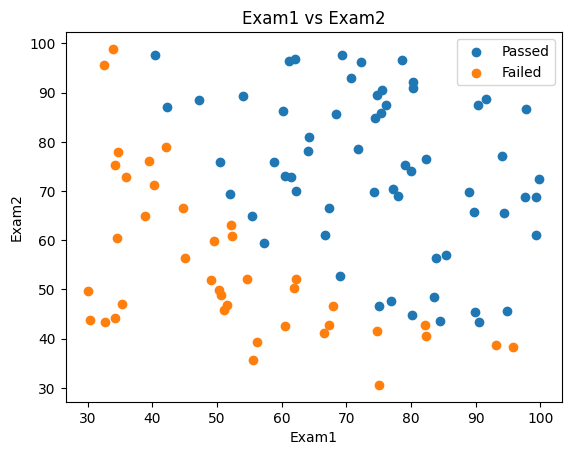

In [430]:
from matplotlib import pyplot as plt
fig1 = plt.figure()
mask = data.loc[:, 'Pass'] == 1
passed = plt.scatter(data.loc[:, 'Exam1'][mask], data.loc[:, 'Exam2'][mask])
failed = plt.scatter(data.loc[:, 'Exam1'][~mask], data.loc[:, 'Exam2'][~mask], )
plt.title('Exam1 vs Exam2') 
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.legend((passed, failed), ('Passed', 'Failed'))
plt.show()

In [431]:
x = data.drop(['Pass'], axis='columns').values.reshape(-1, 2)
y = data.loc[:, 'Pass']
x1 = data.loc[:, 'Exam1']
x2 = data.loc[:, 'Exam2']
x1.head()

0    34.623660
1    30.286711
2    35.847409
3    60.182599
4    79.032736
Name: Exam1, dtype: float64

In [432]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x, y)

LogisticRegression()

In [433]:
from sklearn.metrics import accuracy_score
y_predict = LR.predict(x)
accuracy = accuracy_score(y, y_predict)
print(accuracy)


0.89


In [434]:
y_test = LR.predict([[70, 65]])
print(y_test)

[1]


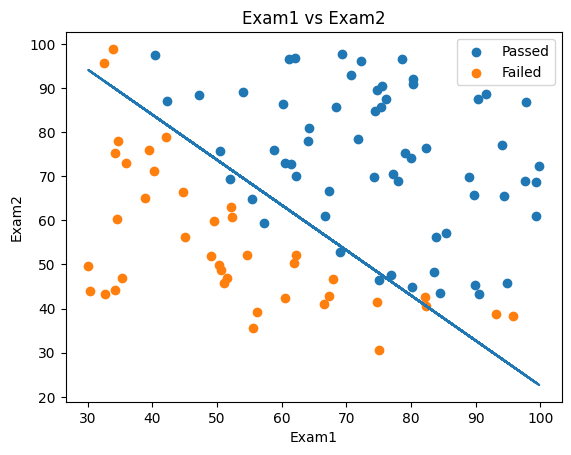

In [435]:
theta1 = LR.coef_[0][0]
theta2 = LR.coef_[0][1]
theta0 = LR.intercept_[0]
x2_new = -(theta0 + theta1 * x1) / theta2

fig3 = plt.figure()
passed = plt.scatter(x1[mask], x2[mask])
failed = plt.scatter(x1[~mask], x2[~mask], )
plt.plot(x1, x2_new)
plt.title('Exam1 vs Exam2') 
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.legend((passed, failed), ('Passed', 'Failed'))
plt.show()

# 二阶逻辑回归

In [436]:
x1_square = x1 ** 2
x2_square = x2 ** 2
x1_x2 = x1 * x2
x_new = {'x1': x1, 'x2': x2, 'x1_square': x1_square, 'x2_square': x2_square, 'x1_x2': x1_x2}
x_new = pd.DataFrame(x_new)
x_new.head()

,x1,x2,x1_square,x2_square,x1_x2
0,34.623660,78.024693,1198.797805,6087.852690,2701.500406
1,30.286711,43.894998,917.284849,1926.770807,1329.435094
2,35.847409,72.902198,1285.036716,5314.730478,2613.354893
3,60.182599,86.308552,3621.945269,7449.166166,5194.273015
4,79.032736,75.344376,6246.173368,5676.775061,5954.672216


In [437]:
LR2 = LogisticRegression(C=10)
LR2.fit(x_new, y)

LogisticRegression(C=10)

In [438]:
y2_predict = LR2.predict(x_new)
accuracy2 = accuracy_score(y, y2_predict)
print(accuracy2)

1.0


In [439]:
x1_sorted = x1.sort_values()

In [440]:
theta0 = LR2.intercept_[0]
theta1, theta2, theta3, theta4, theta5 = LR2.coef_[0]
a = theta4
b = theta5 * x1_sorted + theta2
c = theta0 + theta1 * x1_sorted + theta3 * x1_sorted ** 2
x2_new_boundary = (-b + np.sqrt(b ** 2 - 4 * a * c)) / (2 * a)

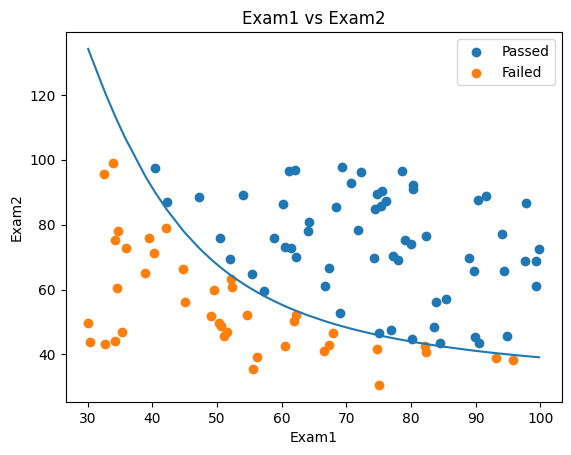

In [441]:
fig5 = plt.figure()
passed = plt.scatter(x1[mask], x2[mask])
failed = plt.scatter(x1[~mask], x2[~mask], )
plt.plot(x1_sorted, x2_new_boundary)
plt.title('Exam1 vs Exam2') 
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.legend((passed, failed), ('Passed', 'Failed'))